# Example: Regression using Mini-Batch Gradient Descent

In this example, we will demonstrate how to train a `QNNRegressor` using mini-batch gradient descent with the `Adam` optimizer.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam

In [2]:
executor = Executor("statevector_simulator")

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

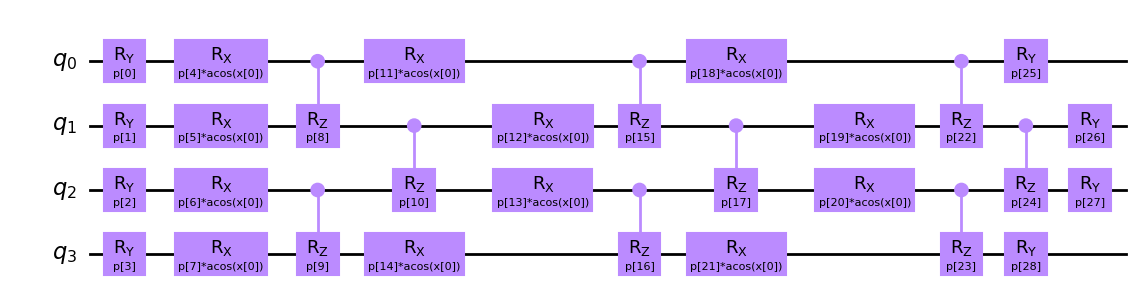

In [3]:
nqubits = 4
number_of_layers = 3

pqc = ChebPQC(nqubits, 1, num_layers=number_of_layers, closed=False)
pqc.draw("mpl")

We also need a cost operator

In [4]:
cost_op = SummedPaulis(nqubits)
print(cost_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `Adam` as the loss function and optimizer respectively. Finally we specify random initial parameters for both, the PQC and cost operator. For the `Adam` optimizer, we specify a maximum number of allowed iterations and a learning rate.

Additionally we specify a batch size, a number of epochs and wether the data should be shuffled before each epoch.

In [5]:
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters) * 4
param_op_ini = np.ones(cost_op.num_parameters)

ADAM = Adam({"maxiter": 25, "lr": 0.1})

reg = QNNRegressor(
    pqc,
    cost_op,
    executor,
    SquaredLoss(),
    ADAM,
    param_ini,
    param_op_ini,
    batch_size=10,
    epochs=5,
    shuffle=True,
)

## Training

Now we are ready to train the model to fit the logarithm funciton

In [6]:
x_space = np.arange(0.1, 0.9, 0.01)
ref_values = np.log(x_space)

reg.fit(x_space, ref_values)

Epoch     1/    5:	average_loss = 0.85857
Epoch     2/    5:	average_loss = 0.14363
Epoch     3/    5:	average_loss = 0.09674
Epoch     4/    5:	average_loss = 0.02930
Epoch     5/    5:	average_loss = 0.01286


## Evaluation

Let's check the trained parameters of the PQC and operator

In [7]:
print("Result PQC params:", reg._param)
print("Result operator params:", reg._param_op)

Result PQC params: [ 2.15911116  1.31628834  2.68301732  4.35210685  2.77889379  1.18533927
  2.50007885  2.54811323  1.55501252  4.53447155  0.77338318  1.70840769
 -0.47584174  3.49279608  0.98947637  1.87474065  2.14878649  2.05456224
 -0.96736775  2.0313618   3.5973204   0.90675774  1.35582958  3.38454099
  1.17231945  0.62626798  1.53041083  2.78385745  0.2504098 ]
Result operator params: [0.01339618 0.69394929 0.73869317 0.68140786 1.67734939]


Also let's plot the predicted function vs. the actual logarithm function

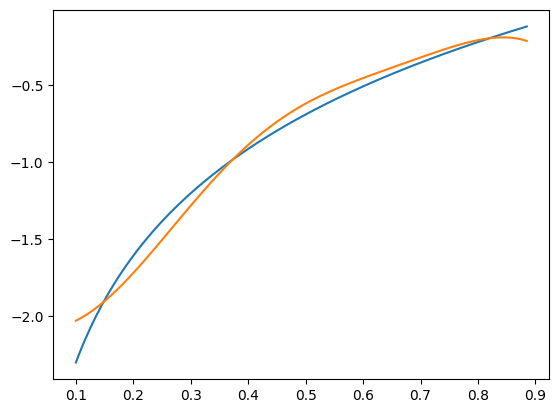

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)